# Load the data

In [36]:
import pandas as pd

# Define the headers you want to assign
headers = ['Tweet ID', 'entity', 'sentiment', 'Tweet content']

# Load the dataset with no headers
df = pd.read_csv('twitter_validation.csv', header=None, names=headers) 

In [37]:
df.head()

,Tweet ID,entity,sentiment,Tweet content
0,3364,Facebook,Irrelevant,I mentioned on Facebook that I was struggling ...
1,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
2,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...
3,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,..."
4,4433,Google,Neutral,Now the President is slapping Americans in the...


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Tweet ID       1000 non-null   int64 
 1   entity         1000 non-null   object
 2   sentiment      1000 non-null   object
 3   Tweet content  1000 non-null   object
dtypes: int64(1), object(3)
memory usage: 31.4+ KB


In [39]:
df.isnull().sum()

Tweet ID         0
entity           0
sentiment        0
Tweet content    0
dtype: int64

In [56]:
print(df.columns)

Index(['entity', 'sentiment'], dtype='object')


In [60]:
df.columns = df.columns.str.strip()

# Drop rows with missing sentiment values
df.dropna(subset=['sentiment'], inplace=True)

# Keep only necessary columns
df = df[['entity', 'sentiment']]  # Updated column name


# Sentiment Analysis


In [65]:
pip install textblob


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 626.3/626.3 kB 5.5 MB/s eta 0:00:00a 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [67]:
import nltk
nltk.download('punkt')
nltk.download('wordnet')


[nltk_data] Downloading package punkt to
[nltk_data]     /Users/akshatsoni/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/akshatsoni/nltk_data...


True

In [71]:
from textblob import TextBlob

# Define a function to calculate sentiment polarity
def get_sentiment(text):
    return TextBlob(text).sentiment.polarity

# Apply the function to create a new column
df['polarity'] = df['entity'].apply(get_sentiment)


# Visualize Sentiment Distribution

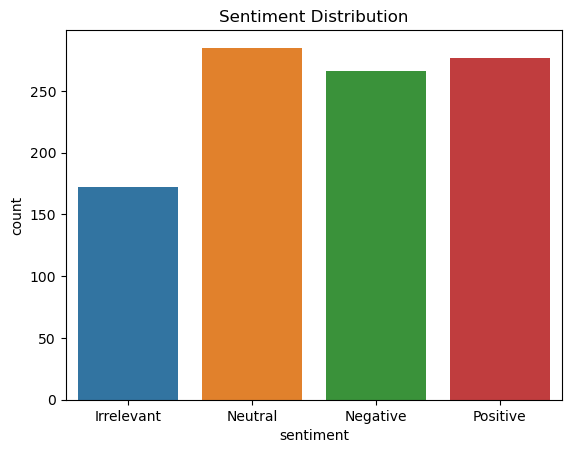

In [74]:
import seaborn as sns
import matplotlib.pyplot as plt

# Countplot of sentiments
sns.countplot(x='sentiment', data=df)
plt.title('Sentiment Distribution')
plt.show()

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


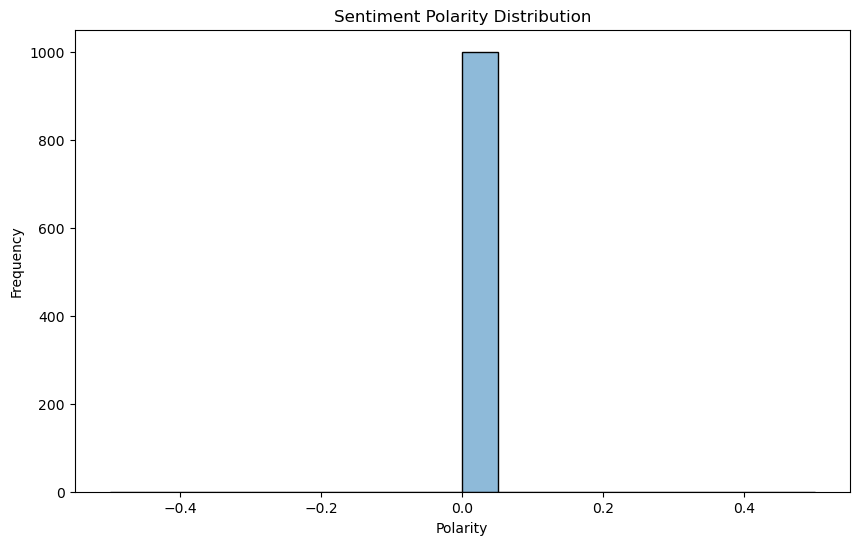

In [76]:
# Histogram of polarity
plt.figure(figsize=(10, 6))
sns.histplot(df['polarity'], bins=20, kde=True)
plt.title('Sentiment Polarity Distribution')
plt.xlabel('Polarity')
plt.ylabel('Frequency')
plt.show()

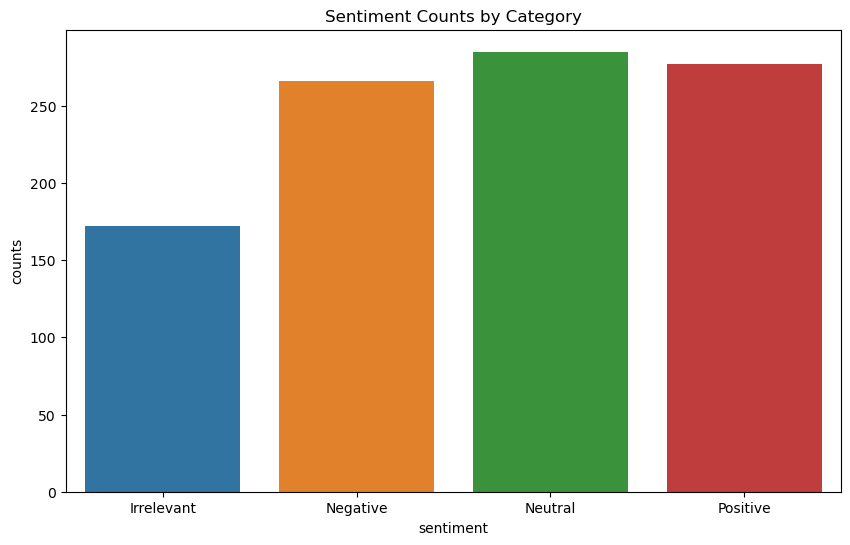

In [78]:
# Example: Group by sentiment and count the occurrences
sentiment_counts = df.groupby('sentiment').size().reset_index(name='counts')

# Plot sentiment counts
plt.figure(figsize=(10, 6))
sns.barplot(x='sentiment', y='counts', data=sentiment_counts)
plt.title('Sentiment Counts by Category')
plt.show()

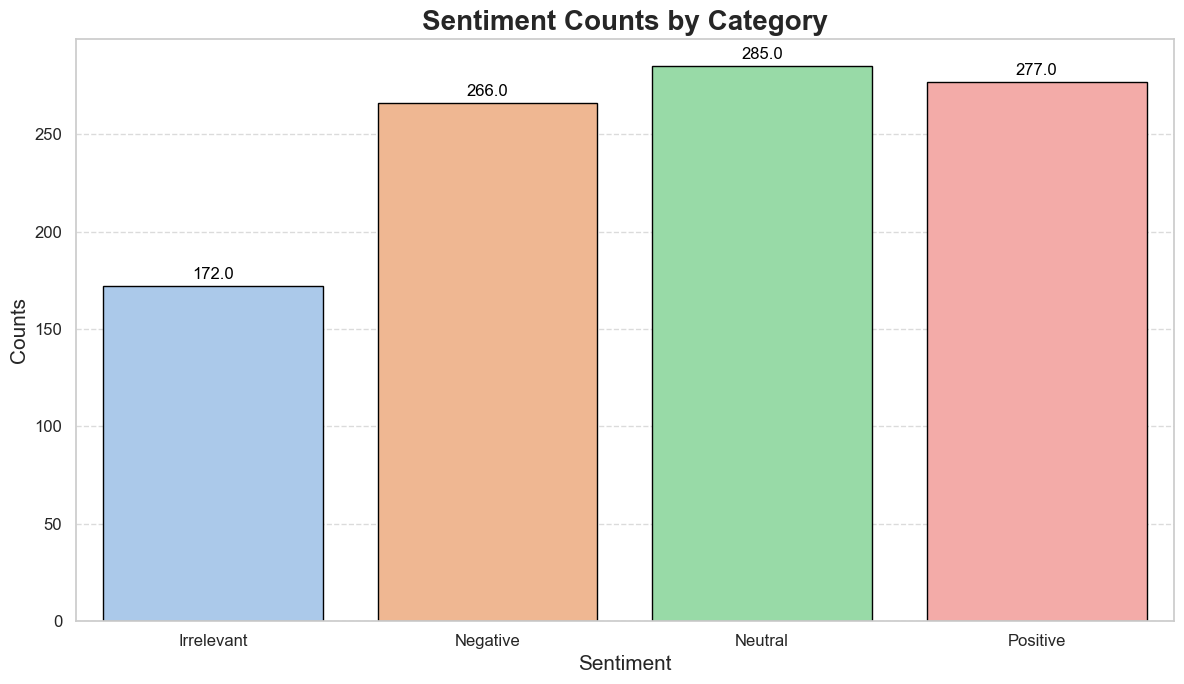

In [80]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the style of the visualization
sns.set(style='whitegrid', palette='pastel')

# Create the bar plot for sentiment counts
plt.figure(figsize=(12, 7))
bar_plot = sns.barplot(x='sentiment', y='counts', data=sentiment_counts, edgecolor='black')

# Add titles and labels
plt.title('Sentiment Counts by Category', fontsize=20, fontweight='bold')
plt.xlabel('Sentiment', fontsize=15)
plt.ylabel('Counts', fontsize=15)

# Enhance the ticks
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Add value annotations on top of the bars
for p in bar_plot.patches:
    bar_plot.annotate(f'{p.get_height()}', 
                      (p.get_x() + p.get_width() / 2., p.get_height()), 
                      ha='center', va='baseline', 
                      fontsize=12, color='black', 
                      xytext=(0, 5), 
                      textcoords='offset points')

# Show gridlines only for the y-axis
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Finalize and display the plot
plt.tight_layout()
plt.show()